In [1]:
#Web Scrapping dos scripts dos episodios da serie de tv americana Arrow

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import re

In [3]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = urllib.request.urlopen("https://subslikescript.com/series/Arrow-2193021")    #dataset esta sem 4 episodios da temporada 7
soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))

for link in soup.find_all('a', href=True):
    
    print(link['href'])

/
/movies
/series
/
/series
/series/Arrow-2193021/season-1/episode-1-Pilot
/series/Arrow-2193021/season-1/episode-2-Honor_Thy_Father
/series/Arrow-2193021/season-1/episode-3-Lone_Gunmen
/series/Arrow-2193021/season-1/episode-4-An_Innocent_Man
/series/Arrow-2193021/season-1/episode-5-Damaged
/series/Arrow-2193021/season-1/episode-6-Legacies
/series/Arrow-2193021/season-1/episode-7-Muse_of_Fire
/series/Arrow-2193021/season-1/episode-8-Vendetta
/series/Arrow-2193021/season-1/episode-9-Years_End
/series/Arrow-2193021/season-1/episode-10-Burned
/series/Arrow-2193021/season-1/episode-11-Trust_But_Verify
/series/Arrow-2193021/season-1/episode-12-Vertigo
/series/Arrow-2193021/season-1/episode-13-Betrayal
/series/Arrow-2193021/season-1/episode-14-The_Odyssey
/series/Arrow-2193021/season-1/episode-15-Dodger
/series/Arrow-2193021/season-1/episode-16-Dead_to_Rights
/series/Arrow-2193021/season-1/episode-17-The_Huntress_Returns
/series/Arrow-2193021/season-1/episode-18-Salvation
/series/Arrow-21930

In [4]:
href_tags = soup.find_all('a',href=True)   
hrefs = [tag.get('href') for tag in href_tags]

In [5]:
hrefs[5]

'/series/Arrow-2193021/season-1/episode-1-Pilot'

In [6]:
len(hrefs)

172

In [7]:
hrefs[170]

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [8]:
lista=[]

for i in range(5,171):
    lista.append(hrefs[i])
      

In [9]:
lista[165]

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [10]:
df_lista = pd.DataFrame(lista)

In [11]:
df_lista

0
0       /series/Arrow-2193021/season-1/episode-1-Pilot
1    /series/Arrow-2193021/season-1/episode-2-Honor...
2    /series/Arrow-2193021/season-1/episode-3-Lone_...
3    /series/Arrow-2193021/season-1/episode-4-An_In...
4     /series/Arrow-2193021/season-1/episode-5-Damaged
..                                                 ...
161     /series/Arrow-2193021/season-8/episode-6-Reset
162  /series/Arrow-2193021/season-8/episode-7-Purga...
163  /series/Arrow-2193021/season-8/episode-8-Crisi...
164  /series/Arrow-2193021/season-8/episode-9-Green...
165  /series/Arrow-2193021/season-8/episode-10-Fadeout

[166 rows x 1 columns]

In [12]:
eps = []

for i in  range(5,171):
  url_base= 'https://subslikescript.com'
  url_final = url_base + hrefs[i]
  page = requests.get(url_final)
  soup = BeautifulSoup(page.content, "lxml")
  results = soup.find_all("div", {"class": "full-script"})
  eps.append(results)


In [13]:
len(eps)

166

In [14]:
type(eps)

list

In [15]:
type(eps[165])

bs4.element.ResultSet

In [16]:
chars = ['<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script> ','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script> ','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn ','Greg, move your head!','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script>','(adsbygoogle = window.adsbygoogle || []).push({});','[<div class="full-script">','<br/><br/>','<br/>', '</div>]','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n     \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n     \r\n</script>' ]

In [17]:
intro ='OLIVER:My name is Oliver Queen.For five years, I was strandedon an island with only one goal:Survive.Oliver Queen is alive.OLIVER:Now, I will fulfill my father\'s dying wish......to use the list of names he left me......and bring down thosewho are poisoning my city.To do this,I must become someone else.I must become something else.'

In [18]:
intro2 = 'My name is Oliver Queen.After five years in hell,I have come home with only one goal:To save my city.Now others have joined my crusade.To them, I\'m Oliver Queen.To the rest of Starling City......I am someone else.I am something else.'

In [19]:
txt=[]
for i in range(len(eps)):
  txt.append(str(eps[i]))
  for c in chars:
    txt[i] = txt[i].replace(c,'')
    txt[i] = txt[i].replace(intro,'')
    txt[i] = txt[i].replace(intro2,'')
    txt[i] = txt[i].replace('1','I')
    txt[i] = txt[i].replace('\\','') #nao remove

In [20]:
len(txt)

166

In [21]:
txt[40]   #em pt????

'Chamo\u200e-me Oliver Queen\u200e.\nDepois de cinco anos\nnuma ilha infernal\u200e.\u200e.\u200e.\nRegressei a casa\napenas com um objetivo\u200e.\u200e.\u200e.\nSalvar a minha cidade\u200e.\nMas\u200e, para isso\u200e, não posso ser\no assassino que era\u200e.\nPara honrar a memória\ndo meu amigo\u200e,\ntenho que ser outra pessoa\u200e.\nTenho que ser\nalgo diferente\u200e.\nAnteriormente\u200e.\u200e.\u200e.\nNo Afeganistão\u200e,\na minha unidade foi incumbida\nde proteger Gholem Qadir\u200e.\nComo achas que o teu irmão\nacabou morto\u200e?\nTu atiraste\nnum cliente e falhaste\u200e.\nEu não falho\u200e.\n\u200e- Tu mataste a Shado\u200e.\n\u200e- Sim\u200e, puxei o gatilho\u200e.\nMas tu apontaste a arma\u200e.\nO que estás a fazer aqui\u200e?\nHá 5 anos\u200e,\nfiz\u200e-te uma promessa\u200e.\nTu não podes morrer\naté conheceres o desespero\u200e.\nE vais conhecê\u200e-lo\u200e.\nPrometo\u200e.\nAnuncie o seu produto ou marca aqui\nContacte www\u200e.OpenSubtitles\u200e.org hoj

## Criando o dataframe

In [22]:
df = pd.DataFrame(txt,columns=['Episodios'])

In [23]:
df.shape

(166, 1)

In [24]:
print(df.loc[[40]])   #em pt

                                            Episodios
40  Chamo‎-me Oliver Queen‎.\nDepois de cinco anos...


In [25]:
df.head()

Episodios
0  The name of the islandthey found me on is Lian...
1  [PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...
2  My name is Oliver Queen.To my family, I am the...
3  My name is Oliver Queen.For 5 years, I was str...
4  OLIVER:My name is Oliver Queen.For five years,...

In [26]:
# Remove punctuation
df['text_processed'] = \
df['Episodios'].map(lambda x: re.sub('[,\.!?]', ' ', x))

In [27]:
# Convert the titles to lowercase
df['text_processed'] = \
df['text_processed'].map(lambda x: x.lower())     

In [28]:
df['text_processed'].head()

0    the name of the islandthey found me on is lian...
1    [panting][grunts][speaking in foreign language...
2    my name is oliver queen to my family  i am the...
3    my name is oliver queen for 5 years  i was str...
4    oliver:my name is oliver queen for five years ...
Name: text_processed, dtype: object

## Primeiro datatset com script cru, script processado e nome do episódio

In [29]:
df_parcial = pd.concat([df_lista, df], axis=1) 

In [30]:
df_parcial.columns = ['nome_ep', 'Episodios','text_processed']

In [31]:
df_parcial.head()

nome_ep  \
0     /series/Arrow-2193021/season-1/episode-1-Pilot   
1  /series/Arrow-2193021/season-1/episode-2-Honor...   
2  /series/Arrow-2193021/season-1/episode-3-Lone_...   
3  /series/Arrow-2193021/season-1/episode-4-An_In...   
4   /series/Arrow-2193021/season-1/episode-5-Damaged   

                                           Episodios  \
0  The name of the islandthey found me on is Lian...   
1  [PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...   
2  My name is Oliver Queen.To my family, I am the...   
3  My name is Oliver Queen.For 5 years, I was str...   
4  OLIVER:My name is Oliver Queen.For five years,...   

                                      text_processed  
0  the name of the islandthey found me on is lian...  
1  [panting][grunts][speaking in foreign language...  
2  my name is oliver queen to my family  i am the...  
3  my name is oliver queen for 5 years  i was str...  
4  oliver:my name is oliver queen for five years ...

In [32]:
df_parcial.loc[40]       # script em portugues

nome_ep           /series/Arrow-2193021/season-2/episode-18-Deat...
Episodios         Chamo‎-me Oliver Queen‎.\nDepois de cinco anos...
text_processed    chamo‎-me oliver queen‎ \ndepois de cinco anos...
Name: 40, dtype: object

In [33]:
df_parcial = df_parcial.drop(df_parcial.index[[40]]) #removendo a linha 40

## Nuvem de palavras

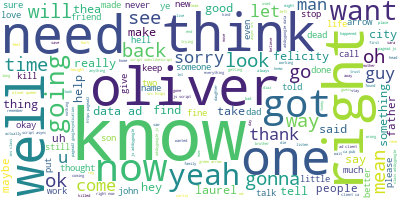

In [34]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed texts together.
long_string = ','.join(list(df_parcial['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [35]:
df_parcial['text_processed'].values #todo o dataset

array(['the name of the islandthey found me on is lian yu it\'s mandarin for purgatory i\'ve been stranded here for five years i\'ve dreamt of my rescueevery cold black night since then for five years i have had only one thought  one goal      survive survive and one day return home the island held many dangers to live  i had to make myselfmore than what i was      to forge myself into a weapon i am returning not the boy who was shipwrecked   <script async="" src="https://pagead2 googlesyndication com/pagead/js/adsbygoogle js"></script>\n< -- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492i76235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n     \r\n</script>   but the man who will bring justiceto those who have poisoned my city my name is oliver queen oliver queen is alive the starling city residentwas found by fisherm

## Tokenizacao e remocao de stopwords

In [36]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'yeah', 'get','go','got','right','gonna','need','oh','well','ok','let','back','going','hey'])
print(stopwords.words() [620:680])


['your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/annagomes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = df_parcial.text_processed.values.tolist()   
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)


print(data_words[:1][0][:30])  #????

['name', 'islandthey', 'found', 'lian', 'yu', 'mandarin', 'purgatory', 'stranded', 'five', 'years', 'dreamt', 'rescueevery', 'cold', 'black', 'night', 'since', 'five', 'years', 'thought', 'goal', 'survive', 'survive', 'day', 'return', 'home', 'island', 'held', 'many', 'dangers', 'live']


In [38]:
# from nltk.stem import PorterStemmer            

# ps=PorterStemmer()

# for i in range(len(data_words)):
#     data_words[i]=ps.stem(str(data_words[i]))
    

In [39]:
len(data_words)

165

In [40]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 3), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 7), (17, 5), (18, 1), (19, 4), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1)]


## Treinamento do modelo

In [41]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"know" + 0.007*"oliver" + 0.005*"think" + 0.004*"like" + 0.004*"city" '
  '+ 0.004*"data" + 0.004*"time" + 0.004*"good" + 0.004*"want" + 0.004*"come"'),
 (1,
  '0.011*"know" + 0.007*"oliver" + 0.006*"think" + 0.005*"city" + 0.005*"like" '
  '+ 0.005*"us" + 0.004*"good" + 0.004*"would" + 0.004*"time" + 0.004*"want"'),
 (2,
  '0.013*"know" + 0.008*"like" + 0.007*"oliver" + 0.005*"think" + 0.004*"us" + '
  '0.004*"see" + 0.004*"want" + 0.004*"time" + 0.004*"city" + 0.004*"sorry"')]


In [42]:
type(doc_lda)

gensim.interfaces.TransformedCorpus

In [43]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/home/annagomes/Documents/mono/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/home/annagomes/Documents/mono/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.004054 -0.002851       1        1  44.308796
2     -0.005062 -0.001431       2        1  34.626200
0      0.001007  0.004283       3        1  21.065004, topic_info=          Term         Freq        Total Category  logprob  loglift
415       know  4093.000000  4093.000000  Default  30.0000  30.0000
523     oliver  2489.000000  2489.000000  Default  29.0000  29.0000
439       like  2070.000000  2070.000000  Default  28.0000  28.0000
189       data  1074.000000  1074.000000  Default  27.0000  27.0000
660        see  1132.000000  1132.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
690      sorry   191.743618  1061.366604   Topic3  -5.9616  -0.1536
1635  felicity   186.941355  1024.163085   Topic3  -5.9869  -0.1433
792         us   217.166187  1465.414495   Topic3  -5.8371  -0.3517
831      would   202.158019  1248.954797   Topic3  -5.9087  -0.2635
460       make   174.335324   915.648831   Topic3  -6.0567  -0.1011

[296 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
846        1  0.644479  absoiuteiy
846        2  0.184137  absoiuteiy
846        3  0.184137  absoiuteiy
26497      1  0.370361       achoo
26497      2  0.555541       achoo
...      ...       ...         ...
11582      2  0.470313         zao
11582      3  0.235156         zao
11587      1  0.250238     zapravo
11587      2  0.500475     zapravo
11587      3  0.250238     zapravo

[636 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [44]:
topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]

#topicos
#1
#2
#3

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Dataframe com os scores de cada topico, onde cada linha é o index do txt (script)


In [45]:
df_topics = pd.DataFrame(topic_scores)

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df_topics.head()

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2
0  0.017143  0.969075  0.013782
1  0.732787  0.267171       NaN
2  0.843540  0.145003  0.011457
3  0.585282  0.408243       NaN
4  0.909272  0.090692       NaN

In [47]:
len(df_topics)

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165

In [48]:
df_topics.loc[4,:]   #scores dos topicos do script 4 

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.909272
1    0.090692
2         NaN
Name: 4, dtype: float64

## Dataset final

In [49]:
df_concat = pd.concat([df_parcial, df_topics], axis=1) 

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df_concat.head()

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nome_ep  \
0     /series/Arrow-2193021/season-1/episode-1-Pilot   
1  /series/Arrow-2193021/season-1/episode-2-Honor...   
2  /series/Arrow-2193021/season-1/episode-3-Lone_...   
3  /series/Arrow-2193021/season-1/episode-4-An_In...   
4   /series/Arrow-2193021/season-1/episode-5-Damaged   

                                           Episodios  \
0  The name of the islandthey found me on is Lian...   
1  [PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...   
2  My name is Oliver Queen.To my family, I am the...   
3  My name is Oliver Queen.For 5 years, I was str...   
4  OLIVER:My name is Oliver Queen.For five years,...   

                                      text_processed         0         1  \
0  the name of the islandthey found me on is lian...  0.017143  0.969075   
1  [panting][grunts][speaking in foreign language...  0.732787  0.267171   
2  my name is oliver queen to my family  i am the...  0.843540  0.145003   
3  my name is oliver queen for 5 years  i was str...  0.585282  0.408243   
4  oliver:my name is oliver queen for five years ...  0.909272  0.090692   

          2  
0  0.013782  
1       NaN  
2  0.011457  
3       NaN  
4       NaN

In [57]:
df_concat2 = df_concat.loc[:,:'Episodios']

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
df_concat2.to_csv('scripts.csv',  sep=';')
# df_concat2.to_csv(r'scripts.txt',  sep=';')

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Lista com os topicos predominantes

In [52]:
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
len(max_topics)

/home/annagomes/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165